Итоговый проект, Канюков Дмитрий ИТХ-2-21

0. Выбрать задачу.

Задачи регрессии (оценка целевого признака из области действительных чисел). Построить не менее 3 моделей (линейная, дерево и любая другая на выбор).

Выбранные модели: 1) Линейная регрессия; 2) Дерево решений; 3) k-ближайших соседей

1. Подобрать и скачать набор данных.

Used cars UK

2. Подписать блокнот, описать используемый набор данных, указать ссылку на источник.

Датасет взят с сайта online.psu.ru в курсе "Анализ данных и машинное обучение (2023-24 год)"


Набор данных used_cars_UK:


*   title - название автомобиля (марка, модель)
*   Price - цена автомобиля
*   Mileage(miles) - пробег автомобиля в милях
*   Registration_Year - год регистрации автомобился
*   Previous Owners - количество предыдущих владельцев автомобиля
*   Fuel type - тип топлива
*   Body type - тип кузова
*   Engine - объем двигателя в литрах
*   Gearbox - тип коробки передач
*   Doors - количество дверей
*   Seats - количество мест
*   Emission Class - класс выбросов автомобиля
*   Service history - история технического обслуживания












3. Сформулировать решаемую задачу, выбрать целевую переменную для задачи классификации или регрессии.

Предсказать цену подержанного автомобиля на основе его характеристик.
Целевая переменная для задачи регрессии: Price.

In [ ]:
# 4. Загрузить данные в датафрейм.
import pandas as pd
path = "/content/drive/MyDrive/python/used_cars_UK.csv"

# Загрузка данных из файла CSV в датафрейм
data = pd.read_csv(path)
# Удаляем первый столбец, т.к. он имеет значения индексов, а они есть в датасете
data.drop(data.columns[[0]],axis=1,inplace = True)
# Вывод первых 5 строк датафрейма
print(data.head())

            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full 

In [ ]:
# 5. Вывести статистическую информацию о наборе данных.
print(data.describe())

              Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3685.000000    3.685000e+03        3685.000000      2276.000000   
mean    5787.145726    8.132816e+04        2011.835007         2.807557   
std     4480.810572    3.942083e+04           5.092566         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.000000         4.000000   
max    33900.000000    1.110100e+06        2023.000000         9.000000   

             Doors        Seats  
count  3660.000000  3650.000000  
mean      4.321038     4.900274  
std       0.986902     0.577200  
min       2.000000     2.000000  
25%       3.000000     5.000000  
50%       5.000000     5.000000  
75%       5.000000     5.000000  
max       5.000000     7.000000  


In [ ]:
#6. Вывести названия столбцов и строк.

#Вывод названий столбцов
print(data.columns,'\n')
#Вывод индексов строк данных
print(data.index,'\n')
# Вывод первых 5 строк датафрейма
print(data.head())

Index(['title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history'],
      dtype='object') 

RangeIndex(start=0, stop=3685, step=1) 

            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0

In [ ]:
#7. Заменить или удалить пропущенные значения.

#Вывод число пропущенных значений в каждом столбце данных

#Создание копий для замен
data1 = data.copy()
data2 = data.copy()
#Вывод индексов строк данных
print(data1.index,'\n')
#Вывод количества пропущенных значений в столбцах до замен
print(data1.isna().sum(),'\n')

#Числовые замены
#Заменяем все пропущенные значения в столбце "Previous Owners" средним значением этого столбца
data1["Previous Owners"].fillna(data["Previous Owners"].mean(), inplace=True)
#Заменяем все пропущенные значения в столбце "Doors" средним значением этого столбца
data1["Doors"].fillna(data["Doors"].mean(), inplace=True)
#Заменяем все пропущенные значения в столбце "Seats" средним значением этого столбца
data1["Seats"].fillna(data["Seats"].mean(), inplace=True)

#Строковые замены
#Заменяем все пропущенные значения в столбце "Engine" средним значением этого столбца, но значение строковые вида "1.2L"
#Преобразуем в числовое значение, отбрасывая "L"
data2["Engine"] = data1["Engine"].str.replace("L","").astype(float)
#Вычисляем среднее значение этого столбца, округляем до 0.1, пребразуем в строковое значение и возвращаем "L"
avg_engine = data2["Engine"].mean().round(1).astype(str) + "L"
print("Средний объем двигателя:", avg_engine,'\n')
#Заменяем все пропущенные значения вычисленным средним
data1["Engine"].fillna(avg_engine, inplace=True)

#Заменяем все пропущенные значения в столбце "Emission Class" средним значением этого столбца, но значение строковые вида "Euro 6"
#Преобразуем в числовое значение, отбрасывая "Euro"
data2["Emission Class"] = data1["Emission Class"].str.replace("Euro","").astype(float)
#Вычисляем среднее значение этого столбца, округляем до 0.0, пребразуем в строковое значение и возвращаем "Euro"
avg_emission_class = "Euro "+ data2["Emission Class"].mean().round(0).astype(int).astype(str)
print("Средний объем двигателя:", avg_emission_class,'\n')
#Заменяем все пропущенные значения вычисленным средним
data1["Emission Class"].fillna(avg_emission_class, inplace=True)

#Заменяем все пропущенные значения в столбце "Service history" словом "Empty" и будут "Full" и "Empty"
data1["Service history"].fillna("Empty", inplace=True)

#Вывод индексов строк данных
print(data1.index,'\n')
#Вывод количества пропущенных значений в столбцах после замен
print(data1.isna().sum(),'\n')

#Возвращаем преобразования в основной датасет
data = data1

RangeIndex(start=0, stop=3685, step=1) 

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64 

Средний объем двигателя: 1.6L 

Средний объем двигателя: Euro 5 

RangeIndex(start=0, stop=3685, step=1) 

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
dtype: int64 



In [ ]:
#8. Заменить категориальные данные количественными.

#Скопируем в новый датасет, который будет иметь количественные данны
data3 = data.copy()
#Выбор всех столбцов с типом данных object в новый датасет
cat_columns = data3.select_dtypes(['object']).columns
#Применяем лямду функцию, преобразующая категориальные данные в числовые, ко всем выбранным столбцам
data3[cat_columns] = data3[cat_columns].apply (lambda x: pd.factorize (x)[ 0 ])

print(data3.head())

   title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0      0   6900           70189               2016         3.000000   
1      1   1495           88585               2008         4.000000   
2      2    949          137000               2011         2.807557   
3      3   2395           96731               2010         5.000000   
4      1   1000           85000               2013         2.807557   

   Fuel type  Body type  Engine  Gearbox  Doors  Seats  Emission Class  \
0          0          0       0        0    5.0    5.0               0   
1          1          0       1        0    3.0    5.0               1   
2          1          0       0        0    5.0    5.0               2   
3          1          0       0        0    3.0    4.0               1   
4          0          0       2        0    5.0    5.0               2   

   Service history  
0                0  
1                1  
2                0  
3                1  
4                0  


In [ ]:
#9. Выбрать важные признаки с помощью корреляционного анализа
#   (оценить их влияние на значение целевого признака в задачах регрессии и классификации).

#Создание корреляционной матрицы
corr_matrix = data3.corr()
#Вывод сортированного списка коэффицентов корреляций к "Price"
print(corr_matrix["Price"].sort_values(ascending=False))

#Целевой признак "Price"
#Высокая положительная корреляция с Registration_Year - сильно влияет на цену
#Низкая положительная корреляция с title, Body type, Gearbox, Service history, Doors, Engine, Fuel type - мало влияет на цену
#Низкая отрицательная корреляция с Seats - мало влияет на цену
#Высокая отрицательная корреляция с Previous Owners, Mileage(miles), Emission Class - чем выше их значение, тем ниже цена

Price                1.000000
Registration_Year    0.723880
title                0.299746
Body type            0.210515
Gearbox              0.195960
Service history      0.139016
Doors                0.113186
Engine               0.079660
Fuel type            0.037876
Seats               -0.027322
Previous Owners     -0.398247
Mileage(miles)      -0.500158
Emission Class      -0.539757
Name: Price, dtype: float64


In [ ]:
#10. Выполнить любые другие действия по конструированию признаков на ваше усмотрение.
#Можно добавать призна - возраст автомобиля
data3['age'] = 2024 - data3['Registration_Year']
print(data3)

#Снова повторяем пункт 9 с новым признаком "age"
corr_matrix = data3.corr()
print(corr_matrix["Price"].sort_values(ascending=False))
# "age" имеет высокую отрицательную корреляцию - чем меньше возраст автомобиля, тем выше цена

      title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0         0   6900           70189               2016         3.000000   
1         1   1495           88585               2008         4.000000   
2         2    949          137000               2011         2.807557   
3         3   2395           96731               2010         5.000000   
4         1   1000           85000               2013         2.807557   
...     ...    ...             ...                ...              ...   
3680     48   1395           76202               2006         4.000000   
3681     56   6990          119000               2012         2.807557   
3682     10   3995          139000               2013         2.807557   
3683     23   1390          179190               2007         2.807557   
3684      1   2000           82160               2013         7.000000   

      Fuel type  Body type  Engine  Gearbox  Doors  Seats  Emission Class  \
0             0          0       0

array([[<Axes: title={'center': 'title'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Mileage(miles)'}>,
        <Axes: title={'center': 'Registration_Year'}>],
       [<Axes: title={'center': 'Previous Owners'}>,
        <Axes: title={'center': 'Fuel type'}>,
        <Axes: title={'center': 'Body type'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Gearbox'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Emission Class'}>],
       [<Axes: title={'center': 'Service history'}>,
        <Axes: title={'center': 'age'}>, <Axes: >, <Axes: >]],
      dtype=object)

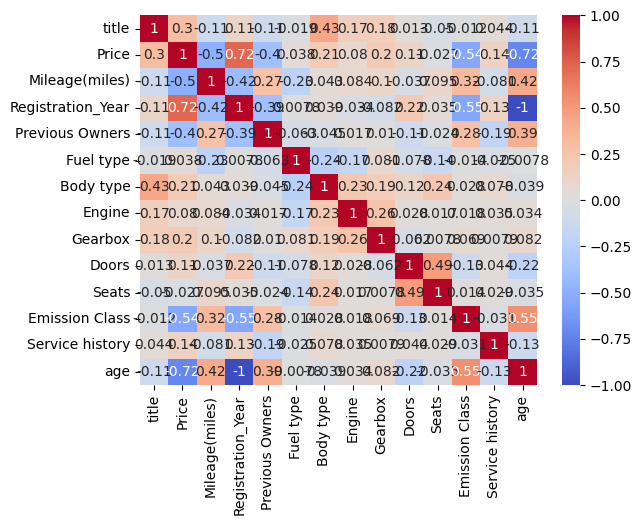

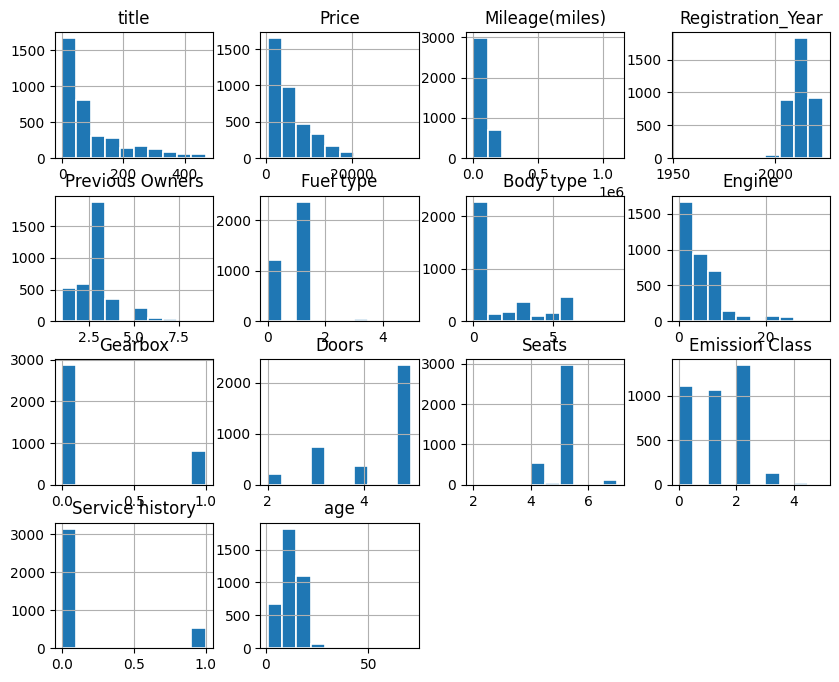

In [ ]:
#11. Визуализировать данные с помощью Matplotlib и Seaborn.

import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация корреляционной матрицы с помощью тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Построение гистограмм для каждого признака
data3.hist(edgecolor='white', linewidth=1.2, figsize=(10, 8))

12. Выбрать и обосновать выбор метрик.

Для оценки модели в задаче регрессии можно использовать следующие метрики:

Оценка R2 — показывает, насколько хорошо модель делает прогнозы по шкале от нуля до единицы.

Средняя абсолютная погрешность (MAE) — определяет среднее абсолютное расстояние модели при составлении прогноза.

Среднеквадратичная ошибка (RMSE) — вычисляет, насколько в среднем прогноз близок к фактическому значению, а также указывает на влияние больших ошибок.


In [ ]:
#13. Построить модели и обучить их. Подбор значений гиперпараметров можно выполнить вручную либо с использованием библиотек Optuna, GridSearch и т.д.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Разделение данных на обучающий и тестовую выборки
X = data3.drop('Price', axis=1)
y = data3['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
lr = LinearRegression()
# Создание модели дерева решений
dt = DecisionTreeRegressor()
# Создание модели k-ближащих соседей
kn = KNeighborsRegressor()

#Линейная регрессия
print("Линейная регрессия")
# Определение гиперпараметра для поиска
param_grid = {'copy_X': [True, False], 'fit_intercept': [True, False]}
# Подбор гиперпараметров методом GridSearch
grid_search1 = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search1.fit(X_train, y_train)
# Вывод лучших гиперпараметров
print('Лучшие гиперпараметры:', grid_search1.best_params_)

#Дерево решений
print("Дерево решений")
# Определение гиперпараметра для поиска
param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
# Подбор гиперпараметров методом GridSearch
grid_search2 = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X_train, y_train)
# Вывод лучших гиперпараметров
print('Лучшие гиперпараметры:', grid_search2.best_params_)

#K-ближайшие соседи
print("K-ближайшие соседи")
# Определение гиперпараметра для поиска
param_grid = {'n_neighbors': [10, 50, 100, 200],'weights': ['uniform', 'distance']}
# Подбор гиперпараметров методом GridSearch
grid_search3 = GridSearchCV(kn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search3.fit(X_train, y_train)
# Вывод лучших гиперпараметров
print('Лучшие гиперпараметры:', grid_search3.best_params_)

Линейная регрессия
Лучшие гиперпараметры: {'copy_X': True, 'fit_intercept': False}
Дерево решений
Лучшие гиперпараметры: {'max_depth': 10, 'min_samples_split': 10}
K-ближайшие соседи
Лучшие гиперпараметры: {'n_neighbors': 200, 'weights': 'distance'}


In [ ]:
#14. Рассчитать значения метрик.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Линейная регрессия
print('Линейная регрессия')
y_pred_lr = grid_search1.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R2:', r2_score(y_test, y_pred_lr))

#Дерево решений
print('\nДерево решений')
y_pred_dt = grid_search2.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('MAE:', mean_absolute_error(y_test, y_pred_dt))
print('R2:', r2_score(y_test, y_pred_dt))

#K-ближайшие соседи
print('\nK-ближайшие соседи')
y_pred_kn = grid_search3.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_kn))
print('MAE:', mean_absolute_error(y_test, y_pred_kn))
print('R2:', r2_score(y_test, y_pred_kn))

Линейная регрессия
MSE: 6557147.346873308
MAE: 1718.7998294652866
R2: 0.6979627879387319

Дерево решений
MSE: 4771026.524591443
MAE: 1161.9837621781314
R2: 0.7802356003414966

K-ближайшие соседи
MSE: 10307867.71735491
MAE: 1864.3231496053693
R2: 0.5251960245897493


15. Проанализировать полученные результаты обучения, выбрав наилучшую модель.

После анализа полученных результатов обучения моделей, наилучшей моделью для решения данной задачи является модель "Дерево решений". Она имеет наименьшее значение среднеквадратичного отклонения (MSE) и среднего абсолютного отклонения (MAE), а также наибольшее значение коэффициента детерминации (R2) по сравнению с другими моделями.

Модель линейной регрессии имеет хуже значения метрик, чем модель "Дерево решений", что может свидетельствовать о том, что линейная модель не способна полностью объяснить зависимость целевой переменной от признаков.

Модель K-ближайших соседей также показывает хуже результаты, чем модель "Дерево решений". Это может быть связано с тем, что модель K-ближайших соседей чувствительна к масштабу признаков и требует тщательной настройки гиперпараметров.

В итоге, наилучшей моделью для решения данной задачи является модель "Дерево решений", которая показала наилучшие результаты по всем трем метрикам.